### Commands that need to be run:
pip3 install xlrd
pip3 install scipy
pip3 install seaborn
pip3 install --upgrade --no-deps statsmodels


In [1]:
### LIBRARIES AND DATA ###
from process import recompile
current_year = 2014
import pickle
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
sns.set(style="whitegrid")
from scipy import stats
countries = ['ZAF', 'COL', 'SGP', 'GRC', 'ITA', 'CZE', 'CHL', 'PER', 'IRL', 'TUR', 'FIN', 'MYS', 'SVN', 'PAK', 'CAN', 'FRA', 'SVK', 'DNK', 'JAM', 'PHL', 'ARG', 'ISR', 'RUS', 'CHE', 'ROU', 'DEU', 'NLD', 'SWE', 'USA', 'NOR', 'CRI', 'BRA', 'NZL', 'EST', 'PRT', 'MLT', 'LVA', 'LKA', 'AUS', 'URY', 'KHM', 'BEL', 'JPN', 'POL', 'MEX', 'LTU', 'AUT', 'VEN', 'BGR', 'KOR', 'ESP', 'IDN', 'HUN', 'ARM', 'GBR', 'BGD', 'ECU', 'THA', 'CYP', 'IND', 'LUX', 'ISR']
countryupdate = ['ZAF', 'COL', 'SGP', 'GRC', 'ITA', 'CZE', 'CHL', 'PER', 'IRL', 'TUR', 'FIN', 'MYS', 'SVN', 'CAN', 'FRA', 'SVK', 'DNK', 'JAM', 'PHL', 'ARG', 'ISR', 'RUS', 'CHE', 'ROU', 'DEU', 'NLD', 'SWE', 'USA', 'NOR', 'CRI', 'BRA', 'NZL', 'EST', 'PRT', 'MLT', 'LVA', 'LKA', 'AUS', 'URY', 'KHM', 'BEL', 'JPN', 'POL', 'MEX', 'LTU', 'AUT', 'VEN', 'BGR', 'KOR', 'ESP', 'IDN', 'HUN', 'ARM', 'GBR', 'ECU', 'THA', 'CYP', 'LUX', 'ISR']

In [2]:
######### READ RAW DATA #########
df=pd.DataFrame(pd.read_csv('dataframes/df.csv')) # average hours worked 
df2=pd.DataFrame(pd.read_csv('dataframes/df2.csv')) # mental health and substance use rates
df3=pd.DataFrame(pd.read_csv('dataframes/df3.csv')) # depression rates
df4=pd.DataFrame(pd.read_csv('dataframes/df4.csv')) # suicide rates and mental health and substance use rate
df6=pd.DataFrame(pd.read_csv('dataframes/df6.csv')) # percent of population living in rural conditions
#df5 = pd.DataFrame(pd.read_excel('CLASS.XLS')) # BAD DATA
df7=pd.DataFrame(pd.read_csv('dataframes/df7.csv')) # WHR Chapter 2 Data
df8=pd.DataFrame(pd.read_csv('dataframes/df8.csv')) # air quality
df9=pd.DataFrame(pd.read_csv('dataframes/df9.csv')) # happiness
df10=pd.DataFrame(pd.read_csv('dataframes/df10.csv'))
df11=pd.DataFrame(pd.read_csv('data archive/enviroment.csv'))

In [6]:
def get_data(df,study,countries=countries,country_code='country',year='year',use_year=True):
    data1 = []
    debug = []
    for country in countries:
        for x in range(len(df[country_code])):
            if df[country_code][x] == country:
                if use_year:
                    if (df[year][x] == current_year):
                        data1.append(df[study][x])
                        debug.append(country)
                        if math.isnan(df[study][x]):
                            print('Missing data from %s' % (country))
                else:
                    data1.append(df[study][x])
                    debug.append(country)
                    if math.isnan(df[study][x]):
                        print('Missing data from %s' % (country))
    return(data1)

In [55]:
from process import recompile
#data1,data2,data3,data4 = (recompile(countries,current_year))
data1v2,data2v2,data3v2,data4v2 = (recompile(countryupdate,current_year))
# data1: work hours
# data2: mental and substance use disorders
# data3: depression rates
# data4: suicide rates

In [54]:
df11.head()

,country,EPI Score,10-Year Percent Change,Environmental Health,Ecosystem Vitality,EH - Health Impacts,EH - Air Quality,EH -Water and Sanitation,EV - Water Resources,EV - Agriculture,...,Fish Stocks,Coastal Shelf Fishing Pressure,Terrestrial Protected Areas (National Biome Weights),Terrestrial Protected Areas (Global Biome Weights),Marine Protected Areas,Critical Habitat Protection,Trend in Carbon Intensity,Change of Trend in Carbon Intensity,Trend in CO2 Emissions per KwH,Access to Electricity
0,CHE,87.67,0.80,92.19,84.67,100.00,76.56,100.00,96.95,49.24,...,NaN,NaN,100.00,100.00,NaN,NaN,67.91,38.47,98.63,100
1,LUX,83.29,3.02,92.26,77.31,94.79,81.98,100.00,95.00,65.33,...,NaN,NaN,100.00,100.00,NaN,NaN,65.21,54.40,39.86,100
2,AUS,82.40,2.32,99.44,71.03,100.00,98.33,100.00,92.33,66.46,...,24.1,14.65,72.06,70.97,99.29,90.0,44.55,31.12,53.98,100
3,SGP,81.78,0.94,99.44,70.01,100.00,98.33,100.00,99.65,96.00,...,0.0,0.00,28.47,28.47,82.04,NaN,90.00,0.00,81.37,73
4,CZE,81.47,3.47,90.63,75.35,100.00,73.99,97.91,75.68,67.07,...,NaN,NaN,98.35,98.41,NaN,NaN,77.62,30.98,54.43,100


In [6]:
Freedom = get_data(df9,'Freedom',use_year=False)

In [7]:
epi=get_data(df11,'EPI Score',use_year=False)

In [8]:
hair=get_data(df11,'Household Air Quality',use_year=False)

In [9]:
Generosity = get_data(df9,'Generosity',use_year=False)

In [10]:
money = get_data(df9,'Economy (GDP per Capita)',use_year=False)

In [11]:
trust = get_data(df9,'Trust (Government Corruption)',use_year=False)

In [12]:
air_quality = get_data(df8,'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)',countries=countries,country_code='Code',year='Year')

In [13]:
air_qualityv2 = get_data(df8,'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)',countries=countryupdate,country_code='Code',year='Year')

In [8]:
happy = get_data(df9,'Happiness Score',use_year=False)

In [15]:
happyv2 = get_data(df9,'Happiness Score',countries=countryupdate,use_year=False)

In [16]:
giving = get_data(df9,'Generosity',use_year=False)

In [13]:
# data1: work hours
# data2: mental and substance use disorders
# data3: depression rates
# data4: suicide rates

In [4]:
def graphit(x1,y1,filename,x_label,y_label,title='Untitled',save=True,country=True):
    plt.scatter(x1,y1)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if country:
        for line in range(0,len(x1)):
            plt.text(x1[line], y1[line], countries[line])
    
    if save:
        plt.savefig('graphs/'+filename+'.png')
    plt.show()

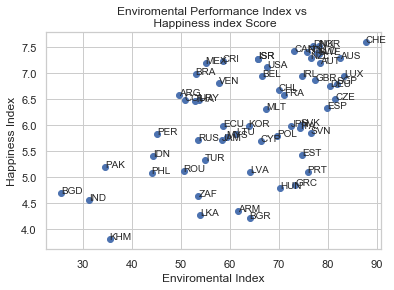

In [9]:
graphit(epi,happy,'epivshappy','Enviromental Index','Happiness Index','Enviromental Performance Index vs \n Happiness index Score',True,True)

In [10]:
### LINEAR REGRESSION ANALYSIS ###
slope, intercept, r_value, p_value, std_err = stats.linregress(epi,happy)
print('The r-squared value is %s.' % (r_value**2))
print('The p value is %s.' % (p_value))
print('The r value is %s.' % (r_value))
print('The slope value is %s.' % (slope))

The r-squared value is 0.3118171071383778.
The p value is 2.4038536021165e-06.
The r value is 0.5584058623782328.
The slope value is 0.04008923090012297.


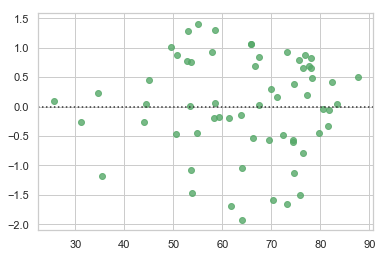

In [68]:
plot = sns.residplot(epi,happy, color="g")
fig = plot.get_figure()
#fig.savefig('aqhred.png')